# **Life cycle analysis of food**

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
from scipy import stats
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF

In [44]:
df = pd.read_excel('Chinese Food Life Cycle Assessment Database.xlsx', sheet_name = 'Water Use')
df.head()

,Foodcode of Chinese Food Composition Table,Food item,Food sub-group,Food group,WU of 1 kg food as consumed \n(m³/kg),Data source,Language of journal
0,11101,wheat,wheat,Cereals,0.046200,"Zhang Y, Huang K, Ridoutt B G, et al. Comparin...",English
1,11101,wheat,wheat,Cereals,0.133980,"Zhang Y, Huang K, Ridoutt B G, et al. Comparin...",English
2,11101,wheat,wheat,Cereals,0.151305,"Zhang Y, Huang K, Ridoutt B G, et al. Comparin...",English
3,11101,wheat,wheat,Cereals,0.181335,灌区粮食生产水足迹的影响因素研究 \nStudy on factors affecting ...,Chinese
4,11101,wheat,wheat,Cereals,0.202125,灌区粮食生产水足迹的影响因素研究 \nStudy on factors affecting ...,Chinese


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2027 entries, 0 to 2026
Data columns (total 7 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Foodcode of Chinese Food Composition Table  2027 non-null   int64  
 1   Food item                                   2026 non-null   object 
 2   Food sub-group                              2027 non-null   object 
 3   Food group                                  2027 non-null   object 
 4   WU of 1 kg food as consumed 
(m³/kg)        2027 non-null   float64
 5   Data source                                 2027 non-null   object 
 6   Language of journal                         942 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 111.0+ KB


In [46]:
df.describe()

,Foodcode of Chinese Food Composition Table,WU of 1 kg food as consumed \n(m³/kg)
count,2027.000000,2027.000000
mean,64529.190429,4.070812
std,50012.151100,5.589431
min,11101.000000,0.039030
25%,13101.000000,1.126823
50%,46010.000000,1.940402
75%,91114.500000,3.863250
max,192016.000000,37.033087


In [47]:
df['Food group'].unique()

array(['Cereals', 'Tubers, starches', 'Legumes', 'Vegetables',
       'Fast foods', 'Fungi and algae', 'Fruit', 'Nuts and seeds', 'Meat',
       'Poultry', 'Dairy', 'Eggs', 'Aquatic products', 'Beverages',
       'Liquor and alcohol', 'Sugars and preserves', 'fats and oils',
       'Fats and oils'], dtype=object)

In [48]:
df['Food sub-group'].unique()

array(['wheat', 'rice', 'corn', 'Sorghum', 'tubers', 'starches',
       'soybean', 'mung bean', 'adzuki bean', 'kidney bean', 'cowpea',
       'root-vegetable', 'leguminous vegetable and sprout',
       'cucurbitaceous and solanaceous vegetable', 'allium vegetable',
       'stem, leafy and flowering vegetable', 'aquatic vegetable',
       'tuber', 'wild vegetable', 'convenience food', 'cake', 'barley',
       'fungus', 'kernel fruit', 'drupe fruit', 'berries', 'orange fruit',
       'tropical fruit', 'melon fruit', 'nut', 'seeds', 'beef', 'duck',
       'liquid milk', 'milk powder', 'egg，chicken', 'egg，duck',
       'partridge egg', 'fish', 'shrimp', 'crab', 'handy food',
       'shellfish', 'other meat', 'ethnic food', 'carbonated drink',
       'fruit juice and drink', 'tee', 'fermented alcoholic beverage',
       'distilled spirits', 'sugars', 'confectionery', 'honey',
       'animal oil', 'vegetable oil', 'pork', 'lamb', 'chicken'],
      dtype=object)

In [49]:
df.rename(columns={'WU of 1 kg food as consumed \n(m³/kg)':'Water_use'}, inplace=True)
df.head()

,Foodcode of Chinese Food Composition Table,Food item,Food sub-group,Food group,Water_use,Data source,Language of journal
0,11101,wheat,wheat,Cereals,0.046200,"Zhang Y, Huang K, Ridoutt B G, et al. Comparin...",English
1,11101,wheat,wheat,Cereals,0.133980,"Zhang Y, Huang K, Ridoutt B G, et al. Comparin...",English
2,11101,wheat,wheat,Cereals,0.151305,"Zhang Y, Huang K, Ridoutt B G, et al. Comparin...",English
3,11101,wheat,wheat,Cereals,0.181335,灌区粮食生产水足迹的影响因素研究 \nStudy on factors affecting ...,Chinese
4,11101,wheat,wheat,Cereals,0.202125,灌区粮食生产水足迹的影响因素研究 \nStudy on factors affecting ...,Chinese


In [50]:
df['Food group'] = df['Food group'].str.lower()

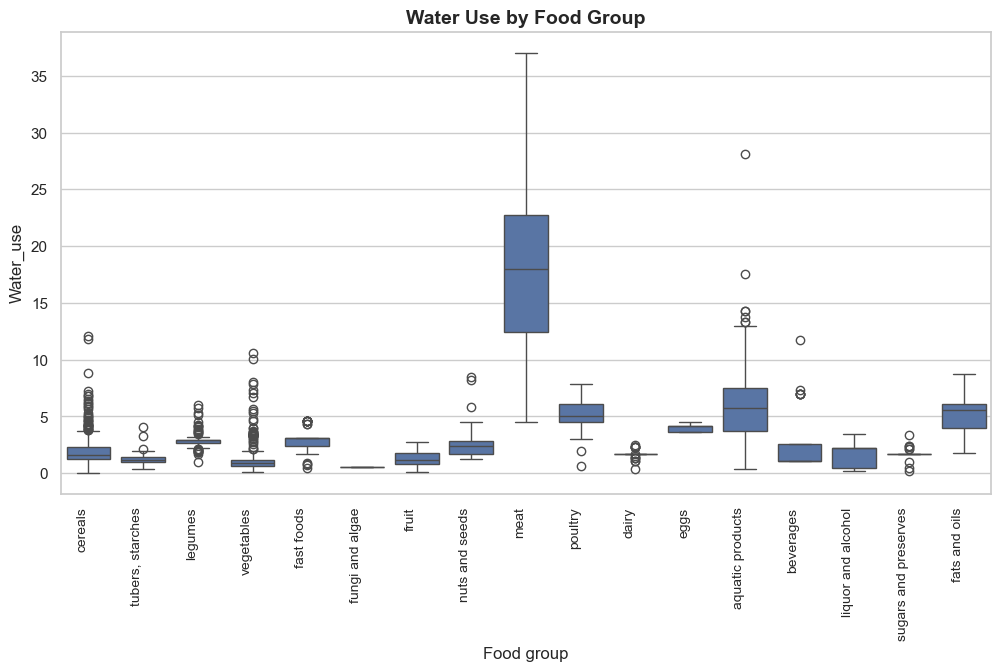

In [52]:
plt.figure(figsize=(12, 6)) 
sns.boxplot(x='Food group', y='Water_use', data=df)
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.title("Water Use by Food Group", fontsize=14, weight='bold')
plt.show()

In [53]:
df['Food group'].value_counts()

Food group
cereals                 548
vegetables              353
meat                    232
fruit                   128
aquatic products        120
legumes                 113
fast foods              109
tubers, starches         62
poultry                  61
nuts and seeds           60
liquor and alcohol       58
dairy                    53
eggs                     39
beverages                39
sugars and preserves     28
fats and oils            22
fungi and algae           2
Name: count, dtype: int64

In [54]:
df['Food sub-group'].value_counts()

Food sub-group
wheat                                       204
corn                                        170
rice                                        156
stem, leafy and flowering vegetable         120
pork                                         97
soybean                                      94
beef                                         94
cucurbitaceous and solanaceous vegetable     87
fish                                         84
kernel fruit                                 48
convenience food                             48
cake                                         47
tubers                                       46
seeds                                        42
lamb                                         39
chicken                                      37
wild vegetable                               33
liquid milk                                  32
leguminous vegetable and sprout              31
distilled spirits                            31
egg，chicken              

In [55]:
# Example: Calculate the count for each 'Food group'
food_counts = df['Food group'].value_counts()

# Create a new column with 'misc' for groups with less than 50 items
df['Food_group_clean'] = df['Food group'].apply(lambda x: x if food_counts[x] >= 50 else 'misc')
df['Food_group_clean'].unique()

array(['cereals', 'tubers, starches', 'legumes', 'vegetables',
       'fast foods', 'misc', 'fruit', 'nuts and seeds', 'meat', 'poultry',
       'dairy', 'aquatic products', 'liquor and alcohol'], dtype=object)

In [56]:
df['Food_group_clean'].value_counts()

Food_group_clean
cereals               548
vegetables            353
meat                  232
misc                  130
fruit                 128
aquatic products      120
legumes               113
fast foods            109
tubers, starches       62
poultry                61
nuts and seeds         60
liquor and alcohol     58
dairy                  53
Name: count, dtype: int64

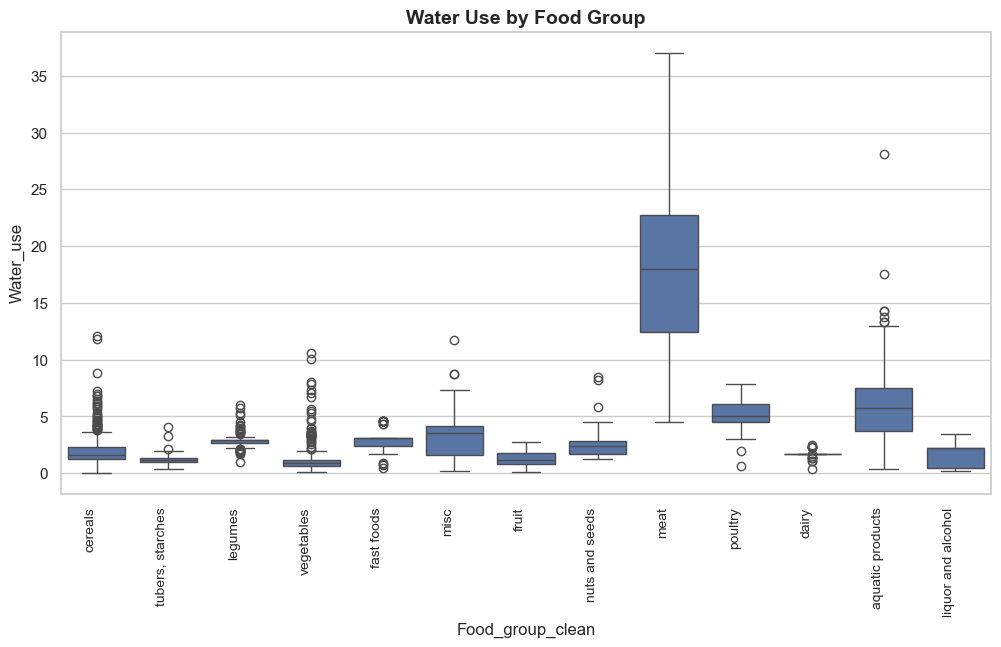

In [57]:
plt.figure(figsize=(12, 6)) 
sns.boxplot(x='Food_group_clean', y='Water_use', data=df)
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.title("Water Use by Food Group", fontsize=14, weight='bold')
plt.show()

In [58]:
formula = 'Water_use ~ C(Food_group_clean)'
model = ols(formula, data=df).fit()
aov_table = anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Food_group_clean),50187.039117,12.0,642.553142,0.0
Residual,13108.733770,2014.0,NaN,NaN


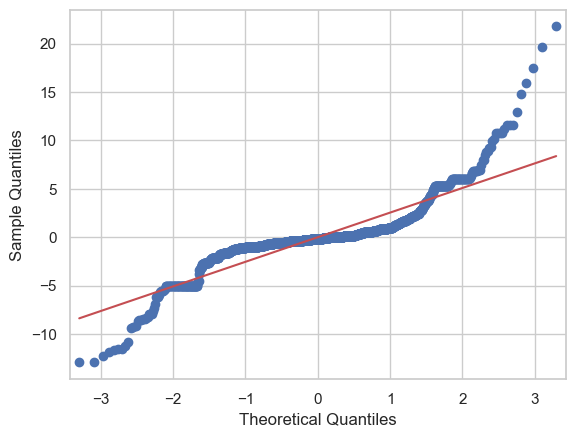

In [59]:
res = model.resid 
fig = sm.qqplot(res, line='s')
plt.show()

<Axes: ylabel='Count'>

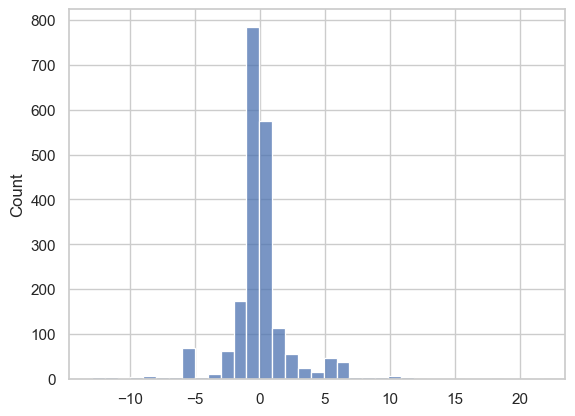

In [62]:
sns.histplot(res, binwidth=1)

In [65]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(endog=df['Water_use'],      # Dependent variable
                          groups=df['Food_group_clean'],  # Grouping variable
                          alpha=0.05)                 # Significance level

# Display the results
print(tukey)


             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
      group1             group2       meandiff p-adj   lower    upper   reject
------------------------------------------------------------------------------
  aquatic products            cereals  -4.4014    0.0  -5.2542  -3.5485   True
  aquatic products              dairy  -4.6062    0.0  -6.0018  -3.2106   True
  aquatic products         fast foods   -3.362    0.0  -4.4817  -2.2424   True
  aquatic products              fruit  -5.1145    0.0  -6.1898  -4.0393   True
  aquatic products            legumes  -3.3653    0.0  -4.4745  -2.2561   True
  aquatic products liquor and alcohol  -4.9113    0.0  -6.2646  -3.5581   True
  aquatic products               meat  11.1102    0.0  10.1587  12.0617   True
  aquatic products               misc   -3.072    0.0  -4.1433  -2.0008   True
  aquatic products     nuts and seeds  -3.7021    0.0  -5.0401  -2.3642   True
  aquatic products            poultry   -1.137 0.187

Assumptions ANOVA:
